# TOPIC MODELING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technical Test Continuum/tweets_wfh.csv')
data = data.drop(['Unnamed: 0', 'Username', 'Tanggal'], axis=1)
data.head()

,Tweet
0,Dekat Olathee for now Isnin semua wfh untuk ki...
1,haha ke kau ni jenis kerja lebih masa kalau WFH
2,Bener ri wkwkwk Akhir Desember 2019 bilang gin...
3,Udah kelamaan wfh sampe lupa ritme jalanan Cap...
4,Karena udah level 1 per besok wfh jadi 25 yg a...


In [ ]:
data = data.dropna(how='any')
data.isnull().sum()

Tweet    0
dtype: int64

In [ ]:
data.dtypes

Tweet    object
dtype: object

In [ ]:
data.shape

(6962, 1)

## Pre-Processing

- lowercasing
- remove stopwords and white space
- remove punctuation
- tokenizing
- stemming

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 7.2 MB/s 


In [ ]:
# import library

import re
import string
from string import punctuation
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory_stop = StopWordRemoverFactory()
stopwords = factory_stop.get_stop_words()

In [ ]:
add_stop = ['yg', 'wkwkwk', 'aja', 'aku', 'gue', 'nak', 'ga', 'jadi', 'lg', 'ni', 'dah', 'tak']
stopwords.extend(add_stop)

In [ ]:
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# lowercasing - remove punctuation
def preprocessing(sentence):
  # lowercasing
  sentence = sentence.lower()

  # remove white space
  sentence = sentence.strip()

  # tokenization
  words = sentence.split()

  # remove punctiation
  remove_table = str.maketrans("", "", punctuation)
  sentence = [x.translate(remove_table) for x in sentence]

  # remove non alfanumeric
  words = [x for x in words if x.isalnum()]

  # remove stopwords
  words = [x for x in words if x not in stopwords]

  # rejoining words
  sentence = " ".join(words)

  # stemming
  sentence = stemmer.stem(sentence)

  # returning sentence
  return sentence

In [ ]:
# remove stopwords
def remove_stopwords(sentence):
  words = sentence.split()
  words = [x for x in words if x not in stopwords]
  sentence = " ".join(words)
  return sentence

#### Apply Functions

In [ ]:
# Pre-processing
data['Tweet'] = [preprocessing(stc) for stc in data['Tweet']]

In [ ]:
data.head()

,Tweet
0,dekat olathee for now isnin semua wfh kickstar...
1,haha kau ni jenis kerja lebih masa kalau wfh
2,bener ri wkwkwk akhir desember 2019 bilang gin...
3,udah lama wfh sampe lupa ritme jalan capek bgt...
4,udah level 1 per besok wfh jadi 25 yg arti min...


In [ ]:
# clear stopwords (again)
data['Tweet'] = [remove_stopwords(stc) for stc in data['Tweet']]

In [ ]:
# clean duplications

mylist = list(dict.fromkeys(data['Tweet']))

## Vectorizing

In [ ]:
text = my_list

In [ ]:
# import library

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(text)
print(vectorizer.get_feature_names(), '\n')
print(vector.shape)

['00', '000', '01', '02', '03', '04', '05', '08', '09', '0907', '10', '100', '1000', '1000x', '100jt', '100k', '10390862', '10583441', '10702683', '10807366', '10998703', '10an', '10k', '10kg', '10m', '10ribu', '11', '11046486', '1111shopeedannct127', '11211996', '11368049', '11429020', '1142987', '11524498', '11608873', '11761877', '11fess', '11mlm', '12', '120', '120rb', '123', '125mbps', '12min', '13', '14', '140', '14k', '15', '150k', '150rb', '15minit', '16', '160', '160ml', '165', '17', '172', '17k', '17rban', '17ribuan', '18', '180', '1818', '186', '18x', '19', '1980', '1bv', '1c', '1hr', '1jt', '1k', '1malaysia', '1mio', '1st', '1tb', '1th', '1user', '1wfo', '1x', '1year', '20', '200', '2000', '200gb', '200mbps', '200x', '2017', '2019', '2020', '2021', '2022', '20jeti', '20jt', '20jtan', '21', '211031', '22', '220', '22k', '22nya', '23', '23kpa', '24', '24h', '24j', '24jam', '24jem', '25', '250gr', '250rb', '250ribu', '25th', '25yo', '26', '26hb', '27', '27hb', '28', '29', '298

In [ ]:
print(vector)

  (0, 2092)	0.3003314878815846
  (0, 9965)	0.1926390686343827
  (0, 970)	0.22501107373257184
  (0, 624)	0.19197654141773757
  (0, 3051)	0.2867660318689146
  (0, 5335)	0.3126648001867196
  (0, 10119)	0.21451717984971164
  (0, 9477)	0.2086324882912076
  (0, 4883)	0.3003314878815846
  (0, 10148)	0.03785108200384826
  (0, 8480)	0.15566100904539173
  (0, 4134)	0.23291982224531363
  (0, 6779)	0.22166262838548556
  (0, 3080)	0.40542600109068305
  (0, 6973)	0.3003314878815846
  (0, 2278)	0.20457217500054548
  (1, 4520)	0.2917187449278759
  (1, 5793)	0.3558323075143614
  (1, 4793)	0.1988499955242701
  (1, 4321)	0.4891006695620134
  (1, 6692)	0.26731423862063036
  (1, 4628)	0.4143155010906064
  (1, 3547)	0.39912558536649545
  (1, 5335)	0.31808201149794313
  (1, 10148)	0.07701377509695789
  :	:
  (5822, 3440)	0.38566968258259365
  (5822, 5378)	0.2538566380044607
  (5822, 8710)	0.2789104062838815
  (5822, 715)	0.18144074357336815
  (5822, 6179)	0.3052512709704646
  (5822, 3648)	0.14312382065791268

### Latent Dirichlet Allocation using Sklearn

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, random_state=42) #n_component = number of topic.
lda.fit(vector)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# Visualize the Topic using WordCloud
from wordcloud import WordCloud

for index, topic in enumerate(lda.components_):
  tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
  teks = " ".join(str(value) for value in tmps)
  wordcloud = WordCloud(max_words=70, background_color='white').generate(teks)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.show()

## Topic Modeling Using Gensim

In [ ]:
# Tokenizing

text_list = [i.split() for i in text]
print(len(text_list))
print(text_list)

5824
[['dekat', 'olathee', 'for', 'now', 'isnin', 'semua', 'wfh', 'kickstart', 'for', 'the', 'week', 'lebih', 'flexible', 'and', 'lebih', 'bagus', 'utk', 'creative', 't'], ['haha', 'kau', 'ni', 'jenis', 'kerja', 'lebih', 'masa', 'kalau', 'wfh'], ['bener', 'ri', 'wkwkwk', 'akhir', 'desember', '2019', 'bilang', 'gin', 'planning', 'tu', 'mei', 'juni', 'april', 'langsung', 'wfh'], ['udah', 'lama', 'wfh', 'sampe', 'lupa', 'ritme', 'jalan', 'capek', 'bgt', 'badan'], ['udah', 'level', '1', 'per', 'besok', 'wfh', 'jadi', '25', 'yg', 'arti', 'minggu', 'cuma', 'sekali', 'jadwal', 'wfhnya'], ['kr', 'baru', '2', 'minggu', 'wfo', 'ken', 'resign', 'lama', 'wfh', 'alas', 'gak', 'kuat', 'berjam2', 'pake', 'masker', 'selalu', 'sakit'], ['wfh', 'hari', 'poko', 'luar', 'biasa', 'mantul', 'uras', 'emosi'], ['rebah', 'kala', 'closing', 'yg', 'mahal', 'terima', 'kasih', 'pandemi', 'pas', 'closing', 'wfh', 'janganlupabersyukur'], ['syukur', 'laku', 'wfh', 'amp', 'wfo', 'kantor'], ['wach', 'siap', 'atuh', 'ze

In [ ]:
# Create phrase using Gensim, Bigram and Trigram
import gensim
from gensim.models import Phrases

In [ ]:
# Create bigrams and trigrams to doc, with minimum count 5, mean only upper than 5 times or more.
bigram = gensim.models.Phrases(text_list, min_count=3, threshold=100)
trigram = gensim.models.Phrases(bigram[text_list], threshold=100)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Tokening bigram and trigram into document

for idx in range(len(text_list)):
  for token in bigram[text_list[idx]]:
    if '_' in token:
      text_list[idx].append(token)
  for token in trigram[text_list[idx]]:
    if '_' in token:
      text_list[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
text_list

In [ ]:
# Create dictionary from text_list

from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

# no_below = keep token which are contained in at least no_below document
# no_above = keep token which are contained in no more than no_above document

print(dictionary)

Dictionary(1934 unique tokens: ['and', 'bagus', 'dekat', 'for', 'isnin']...)


In [ ]:
# Convert corpus into matrix using dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

# doc2bow is a function which convert document(list of words) into bag-of-words (vectorizing method)

print(len(doc_term_matrix))
print(doc_term_matrix[10])
tfidf = models.TfidfModel(doc_term_matrix) # build tfidf model
corpus_tfidf = tfidf[doc_term_matrix]

5824
[(89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1)]


In [ ]:
# modeling using gensim and using Coherence Score to evaluate model

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Fuction to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts,
                                    dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Apply function

start = 1
limit = 15 # 10 topic
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start,
                                                        limit=limit, step=step)

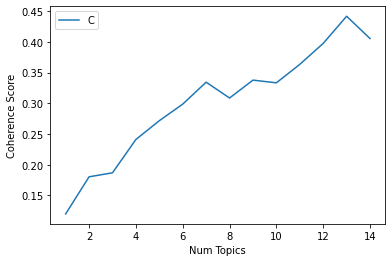

In [ ]:
# Visualize the graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('Coherence Values'), loc='best')
plt.show()

In [ ]:
# Print Coherence Score

for m, cv in zip(x, coherence_values):
  print('Num Topics =', m, ' has Coherence Value of', round(cv, 5))

Num Topics = 1  has Coherence Value of 0.11995
Num Topics = 2  has Coherence Value of 0.18034
Num Topics = 3  has Coherence Value of 0.18686
Num Topics = 4  has Coherence Value of 0.24111
Num Topics = 5  has Coherence Value of 0.27166
Num Topics = 6  has Coherence Value of 0.29865
Num Topics = 7  has Coherence Value of 0.33437
Num Topics = 8  has Coherence Value of 0.30859
Num Topics = 9  has Coherence Value of 0.33771
Num Topics = 10  has Coherence Value of 0.3333
Num Topics = 11  has Coherence Value of 0.36336
Num Topics = 12  has Coherence Value of 0.39751
Num Topics = 13  has Coherence Value of 0.44168
Num Topics = 14  has Coherence Value of 0.40537


The best Num of topic is 8, with coherence value 0.335

In [ ]:
# Finding dominant word

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=13) # after look at coherence values
for idx, topic in model.print_topics():
  print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
# Show top 10 words in each topic

top_words_per_topic = []
for t in range(model.num_topics):
  top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn=10)])

In [ ]:
df_new = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
df_new

,Topic,Word,P
0,0,kerja,0.011109
1,0,aja,0.009881
2,0,sama,0.009169
3,0,hari,0.008053
4,0,gue,0.007406
...,...,...,...
125,12,kak,0.007400
126,12,baru,0.007246
127,12,tengah,0.007069
128,12,lah,0.006855


In [ ]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9 MB 8.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.0 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)

pyLDAvis.save_html(data, 'lda-gensim.html')